<a href="https://colab.research.google.com/github/salmanromeo/MAE_3403_Computer_Methods_in_Analysis_and_Design/blob/main/adaptive_integration_simpson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Execution Time: 0.06483983993530273 seconds
exact: -0.56681975015 0.0
numerical: -0.5668197501529285 5.166627121904705e-10


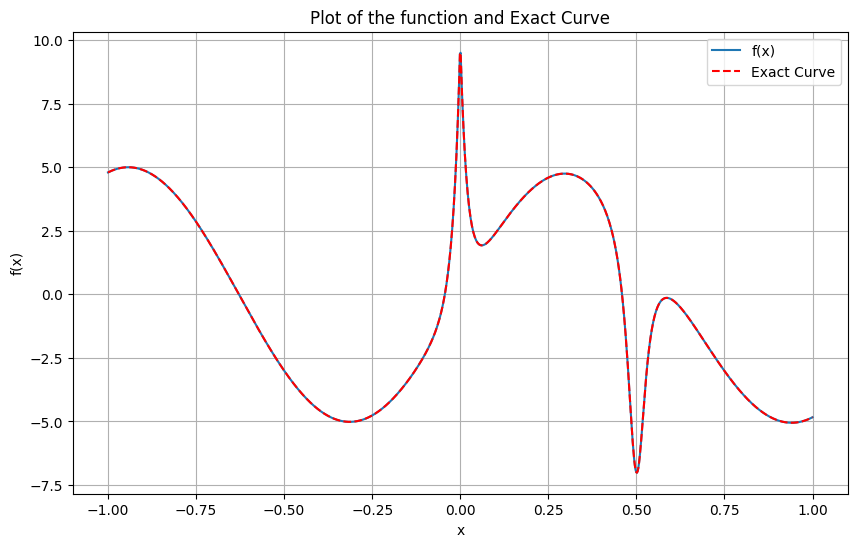

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

def f(x):
    return 10.0 * np.exp(-50.0 * np.abs(x)) \
           - 0.01 / ((x - 0.5) ** 2 + 0.001) \
           + 5.0 * np.sin(5.0 * x)

def integrate(x, h):
    S1 = h / 6.0 * (f(x) + 4.0 * f(x + 0.5 * h) + f(x + h))
    S2 = h / 12.0 * (f(x) + 4.0 * f(x + 0.25 * h) + 2.0 * f(x + 0.5 * h) + 4.0 * f(x + 0.75 * h) + f(x + h))
    return (16.0 * S2 - S1) / 15.0

def adaptive_integration_simpson(a, b, np):
    # Record start time
    start_time = time.time()

    eps = (b - a) / np

    # Integrate each segment
    results = [integrate(a + i * eps, eps) for i in range(np)]
    S = sum(results)

    # Print execution time
    end_time = time.time()
    execution_time = end_time - start_time
    print("Execution Time:", execution_time, "seconds")

    return S

def plot_function(a, b):
    x_values = np.linspace(a, b, 1000)
    y_values = f(x_values)
    exact_values = f(x_values)

    plt.figure(figsize=(10, 6))
    plt.plot(x_values, y_values, label='f(x)')
    plt.plot(x_values, exact_values, label='Exact Curve', linestyle='--', color='red')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('Plot of the function and Exact Curve')
    plt.grid(True)
    plt.legend()
    plt.show()

def main():
    a = -1.0  # lower bound
    b = 1.0   # upper bound
    np = 2000
    geps = 1.0e-4  # error criterion
    eI = -0.56681975015  # exact solution

    S = adaptive_integration_simpson(a, b, np)

    print("exact:", eI, 100.0 * abs((eI - eI) / eI))
    print("numerical:", S, 100.0 * abs((S - eI) / eI))

    plot_function(a, b)

if __name__ == "__main__":
    main()